# GEDI_L2B Search and Visualize

Authors: Samuel Ayers (UAH), Sumant Jha (MSFC/USRA), Anish Bhusal (UAH), Alex Mandel (DevSeed), Aimee Barciauskas (DevSeed)

Date: December 19, 2022

Description: In this tutorial, we will use the integrated Earthdata search function in MAAP Algorithm Development Environment (ADE) to search for GEDI L2B data for an area of interest. We will then download some of this data and read its attributes in preparation for some analysis. We will perform a spatial subset on the data to reduce data volumes, and then make some basic plots of our data.

## Run This Notebook
To access and run this tutorial within MAAP's Algorithm Development Environment (ADE), please refer to the ["Getting started with the MAAP"](https://docs.maap-project.org/en/latest/getting_started/getting_started.html) section of our documentation.

Disclaimer: it is highly recommended to run a tutorial within MAAP's ADE, which already includes packages specific to MAAP, such as maap-py. Running the tutorial outside of the MAAP ADE may lead to errors.

## About the Data

GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002

This dataset provides Global Ecosystem Dynamics Investigation (GEDI) Level 2 (L2) data, which has the purpose of extracting biophysical metrics and consists of Canopy Cover and Vertical Profile Metrics. These metrics are derived from the L1B waveform, and include canopy cover, Plant Area Index (PAI), Plant Area Volume Density (PAVD), and Foliage Height Diversity (FHD). GEDI is attached to the International Space Station (ISS) and collects data globally between 51.6° N and 51.6° S latitudes at the highest resolution and densest sampling of any light detection and ranging (lidar) instrument in orbit to date; specifically, GEDI L2B data has a spatial resolution of 25m. (Source: [GEDI L2B CMR Search](https://cmr.earthdata.nasa.gov/search/concepts/C1908350066-LPDAAC_ECS.html))

## Additional Resources
- [GEDI_L2B Version 2 Dataset Landing Page](https://lpdaac.usgs.gov/products/gedi02_bv002/)
- [GEDI Level 2 Version 2 User Guide](https://lpdaac.usgs.gov/documents/998/GEDI02_UserGuide_V21.pdf)
- [The GEDI Website](https://gedi.umd.edu/)

## Importing and Installing Packages

We will begin by installing any packages we need and importing the packages that we will use.

**Prerequisites** 

* geopandas
* folium

In [ ]:
# Uncomment the following lines to install these packages if you haven't already.
# !pip install geopandas
# !pip install folium

In [38]:
from maap.maap import MAAP
maap = MAAP(maap_host='api.maap-project.org')
import geopandas as gpd
import folium
import h5py
import pandas
import matplotlib
import matplotlib.pyplot as plt
import shapely
import os

## Search Data Using an AOI

We will search and download GEDI L2B data using the bounding box of a vector AOI. Firstly, an AOI over the Shenandoah National Park will be created and then we will plot its location on a map.

In [39]:
# Using bounding coordinates to create a polygon around Shenandoah National Park
lon_coords = [-78.32129105072025, -78.04618813890727, -78.72985973163064, -79.0158578082679, -78.32129105072025]
lat_coords = [38.88703610703791, 38.74909216350823, 37.88789051477522, 38.03177640342157, 38.88703610703791]

polygon_geom = shapely.geometry.polygon.Polygon(zip(lon_coords, lat_coords))
crs = 'epsg:4326'
AOI = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])

We can get the bounding box of the AOI so we can use it as a spatial limit on our data search. GeoPandas has a function for returning the spatial coordinates of a bounding box:

In [40]:
# Get the bounding box of the shp
bbox = AOI.bounds
# print the bounding box coords
print('minx = ', bbox['minx'][0])
print('miny = ', bbox['miny'][0])
print('maxx = ', bbox['maxx'][0])
print('maxy = ', bbox['maxy'][0])

minx =  -79.0158578082679
miny =  37.88789051477522
maxx =  -78.04618813890727
maxy =  38.88703610703791


Let's look at our AOI on an interactive map using folium.

In [41]:
m = folium.Map(location=[38.5, -78], zoom_start=9, tiles='CartoDB positron')
geo_j = folium.GeoJson(data=AOI, style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)
m

## Search using the EarthData Search Integration

Search Data: To search GEDI data we can use the EarthData search integration in the MAAP ADE. Open the Earthdata search toolbar by clicking on the following:

![EarthData](../../_static/EarthdataSearch.png)

This will open up the EarthData search interface in a new tab. We can use the search bar to search GEDI L2B data. By entering "L2B" in the search bar, we can see the relevant GEDI data is filtered. Click on the dataset to get more details.

![EarthDataInterface](../../_static/EDinterface.png)

While we have been searching for data, the MAAP ADE has been keeping a track of our search parameters. This means that we can easily insert our search for GEDI data straight into our notebook.

![PasteResults](../../_static/PasteResults.png)

## Inspect and Filter through the Data

This gives us our search parameters in our notebook using the GEDI dataset ID. The default limit for the number of returned results is 1000. Running this will produce 1000 results, but we can look at the first one by indexing the list of returned results. This is what the data entry looks like. You can see a large amount of metadata for the file along with the URL for where this specific file is stored.

In [42]:
data = maap.searchGranule(cmr_host='cmr.earthdata.nasa.gov', concept_id="C1908350066-LPDAAC_ECS", limit=1000)[0]
data

{'concept-id': 'G2011069580-LPDAAC_ECS',
 'collection-concept-id': 'C1908350066-LPDAAC_ECS',
 'revision-id': '10',
 'format': 'application/echo10+xml',
 'Granule': {'GranuleUR': 'SC:GEDI02_B.002:2433465280',
  'InsertTime': '2021-02-22T19:16:30.675Z',
  'LastUpdate': '2021-09-16T13:36:07.965Z',
  'Collection': {'DataSetId': 'GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002'},
  'DataGranule': {'SizeMBDataGranule': '16.5413',
   'ProducerGranuleId': 'GEDI02_B_2019108002012_O01959_01_T03909_02_003_01_V002.h5',
   'DayNightFlag': 'UNSPECIFIED',
   'ProductionDateTime': '2021-02-21T14:45:08Z'},
  'PGEVersionClass': {'PGEVersion': '003'},
  'Temporal': {'RangeDateTime': {'BeginningDateTime': '2019-04-18T00:20:12.000000Z',
    'EndingDateTime': '2019-04-18T01:52:53.000000Z'}},
  'Spatial': {'HorizontalSpatialDomain': {'Geometry': {'GPolygon': {'Boundary': {'Point': [{'PointLongitude': '80.2890335089',
         'PointLatitude': '-4.6168623465'},
        {'Po

So far, this search function requests all of the GEDI data but we can add a spatial subset filter using our AOI from above to limit the results. Adding a spatial filter returns 259 GEDI L2B files that intersect with our AOI.

In [43]:
data_aoi = maap.searchGranule(cmr_host='cmr.earthdata.nasa.gov', concept_id="C1908350066-LPDAAC_ECS", bounding_box="-79.0158578082679,37.88789051477522,-78.04618813890727,38.887036107037915", limit=1000)
print(len(data_aoi))

259


This is more data than we need, so let's look at the contents of a single GEDI file. Firstly we need to bring it from the server side (S3) to our local side. This can be done using the MAAP function getData. We'll create a new data directory, and then we will pull the 7th file in our search results.

In [44]:
# set data directory
dataDir = './data'

# check if directory exists -> if directory doesn't exist, directory is created
if not os.path.exists(dataDir):
    os.mkdir(dataDir)

In [45]:
# pulling the 7th file into the new directory
gedi_data = data_aoi[6].getData(dataDir)
print(gedi_data)

./data/GEDI02_B_2019145051352_O02537_03_T04809_02_003_01_V002.h5


GEDI data has 8 beams. So, we will check that all beams are in our file and print a list of the available beams.

In [46]:
gedi_h5_file = h5py.File(gedi_data, 'r')
gedi_keys = list(gedi_h5_file.keys())
gedi_beams = ['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']
gedi_beams_lst = []
for gedi_beam_name in gedi_keys:
    if gedi_beam_name in gedi_beams:
        gedi_beams_lst.append(gedi_beam_name)
print(gedi_beams_lst)

['BEAM0000', 'BEAM0001', 'BEAM0010', 'BEAM0011', 'BEAM0101', 'BEAM0110', 'BEAM1000', 'BEAM1011']


For each beam, we need to get all of the data and metrics associated with it. For this, we have a function that will gather all of the metrics we want and put them into a geopandas dataframe:

In [47]:
def get_gedi_df(gedi_h5_file, gedi_beam_name):
    gedi_beam = gedi_h5_file[gedi_beam_name]
    
    # Get location info.
    gedi_beam_geoloc = gedi_beam['geolocation']
    # Get land cover data.
    gedi_beam_landcover = gedi_beam['land_cover_data']

    gedi_beam_df = pandas.DataFrame(
            {'elevation_bin0'         : gedi_beam_geoloc['elevation_bin0'],
             'elevation_lastbin'      : gedi_beam_geoloc['elevation_lastbin'],
             'height_bin0'            : gedi_beam_geoloc['height_bin0'],
             'height_lastbin'         : gedi_beam_geoloc['height_lastbin'],
             'shot_number'            : gedi_beam_geoloc['shot_number'],
             'solar_azimuth'          : gedi_beam_geoloc['solar_azimuth'],
             'solar_elevation'        : gedi_beam_geoloc['solar_elevation'],
             'latitude_bin0'          : gedi_beam_geoloc['latitude_bin0'],
             'latitude_lastbin'       : gedi_beam_geoloc['latitude_lastbin'],
             'longitude_bin0'         : gedi_beam_geoloc['longitude_bin0'],
             'longitude_lastbin'      : gedi_beam_geoloc['longitude_lastbin'],
             'degrade_flag'           : gedi_beam_geoloc['degrade_flag'],
             'digital_elevation_model': gedi_beam_geoloc['digital_elevation_model'],
             'landsat_treecover'      : gedi_beam_landcover['landsat_treecover'],
             'modis_nonvegetated'     : gedi_beam_landcover['modis_nonvegetated'],
             'modis_nonvegetated_sd'  : gedi_beam_landcover['modis_nonvegetated_sd'],
             'modis_treecover'        : gedi_beam_landcover['modis_treecover'],
             'modis_treecover_sd'     : gedi_beam_landcover['modis_treecover_sd'],
             'beam'                   : gedi_beam['beam'],
             'cover'                  : gedi_beam['cover'],
             'master_frac'            : gedi_beam['master_frac'],
             'master_int'             : gedi_beam['master_int'],
             'num_detectedmodes'      : gedi_beam['num_detectedmodes'],
             'omega'                  : gedi_beam['omega'],
             'pai'                    : gedi_beam['pai'],
             'pgap_theta'             : gedi_beam['pgap_theta'],
             'pgap_theta_error'       : gedi_beam['pgap_theta_error'],
             'rg'                     : gedi_beam['rg'],
             'rh100'                  : gedi_beam['rh100'],
             'rhog'                   : gedi_beam['rhog'],
             'rhog_error'             : gedi_beam['rhog_error'],
             'rhov'                   : gedi_beam['rhov'],
             'rhov_error'             : gedi_beam['rhov_error'],
             'rossg'                  : gedi_beam['rossg'],
             'rv'                     : gedi_beam['rv'],
             'sensitivity'            : gedi_beam['sensitivity'],
             'stale_return_flag'      : gedi_beam['stale_return_flag'],
             'surface_flag'           : gedi_beam['surface_flag'],
             'l2a_quality_flag'       : gedi_beam['l2a_quality_flag'],
             'l2b_quality_flag'       : gedi_beam['l2b_quality_flag']})

    gedi_beam_gdf = gpd.GeoDataFrame(gedi_beam_df, crs='EPSG:4326',
                                           geometry=gpd.points_from_xy(gedi_beam_df.longitude_lastbin,
                                                                             gedi_beam_df.latitude_lastbin))
    return gedi_beam_gdf

To access the data with this function, we can call the function for each beam id that we have:


In [48]:
BEAM0000 = get_gedi_df(gedi_h5_file, 'BEAM0000')
BEAM0001 = get_gedi_df(gedi_h5_file, 'BEAM0001')
BEAM0010 = get_gedi_df(gedi_h5_file, 'BEAM0010')
BEAM0011 = get_gedi_df(gedi_h5_file, 'BEAM0011')
BEAM0101 = get_gedi_df(gedi_h5_file, 'BEAM0101')
BEAM0110 = get_gedi_df(gedi_h5_file, 'BEAM0110')
BEAM1000 = get_gedi_df(gedi_h5_file, 'BEAM1000')
BEAM1011 = get_gedi_df(gedi_h5_file, 'BEAM1011')

Now we can look at the data in one of the dataframes (beams). We can see that there are 108583 GEDI shots (108583 entries in each column).

In [49]:
print(BEAM0000.head())
print('number of rows = ', len(BEAM0000))

   elevation_bin0  elevation_lastbin  height_bin0  height_lastbin  \
0      533.320205         532.870899 -9999.000000    -9999.000000   
1      533.610735         533.161429 -9999.000000    -9999.000000   
2      835.586133         790.954687    42.284134       -2.373195   
3      822.361914         780.875651    38.280968       -3.229356   
4      788.459662         760.602475    25.957445       -1.915897   

         shot_number  solar_azimuth  solar_elevation  latitude_bin0  \
0  25370000300165164     -34.511044       -10.500773      51.821288   
1  25370000300165165     -34.510292       -10.501078      51.821282   
2  25370000300165166     -34.509689       -10.501341      51.821258   
3  25370000300165167     -34.508926       -10.501648      51.821253   
4  25370000300165168     -34.508163       -10.501955      51.821249   

   latitude_lastbin  longitude_bin0  ...  rhov  rhov_error  rossg  \
0         51.821288     -127.096372  ...   0.6     -9999.0    0.5   
1         51.821282 

## Create the Subset and Display the Data

Before  displaying this data we can do a spatial subset to remove the data outside of our AOI by doing a spatial subset. We use the Geopandas clip function to clip out the GEDI data based on the extent of our AOI. This reduces the size of the dataframe from 108583 rows to 508.

In [50]:
BEAM0000_sub = gpd.clip(BEAM0000, AOI)
len(BEAM0000_sub)

508

We can display this subset of data over our AOI extent.

In [51]:
m = folium.Map(location=[38.5, -78], zoom_start=9, tiles='CartoDB positron')

geo_j = folium.GeoJson(data=AOI, style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)

geo_g = folium.GeoJson(data=BEAM0000_sub,marker = folium.CircleMarker(radius = 1, # Radius in metres
                                           weight = 0, #outline weight
                                           fill_color = '#FF0000', 
                                           fill_opacity = 1))
geo_g.add_to(m)
m

Now we have this subset of data, we can look at some of the GEDI metrics over our area of interest. The 'rh100' metric should give us the top of the canopy heights. What does this look like over Shenandoah National Park? We will look at the ground height and the 'rh100' above ground. The DEM metric is in meters (m) and the 'rh100' metric is in centimeters (cm) above the ground height. Therefore we must add the 'rh100' value to the ground height to get the total height of the tree for display purposes. The 'rh100' metric is also converted to meters (m) to normalize the units

In [52]:
latitude = BEAM0000_sub['latitude_lastbin']
rh100 = BEAM0000_sub['rh100']
ground = BEAM0000_sub['digital_elevation_model']

TreeHeight = ground + rh100/100

Finally, we can make a plot of the ground surface and the canopy heights above the ground surface. We can see the forest canopies in green above the topographically complex ground in brown.

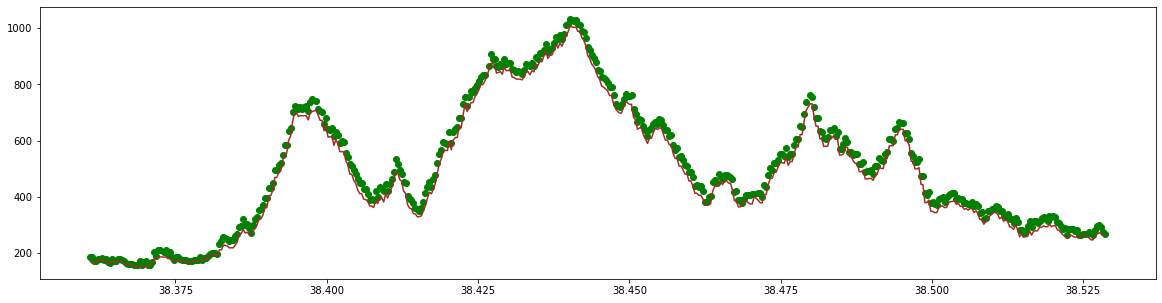

In [53]:
plt.figure(figsize=(20, 5))
plt.scatter(latitude, TreeHeight, c='green')
plt.plot(latitude, ground, c='brown')

Now you have this basic structure you can investigate some of the other metrics and GEDI beams to understand more about the data.